In [1]:
%matplotlib inline

import pandas as pd

# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [2]:
data = pd.read_csv('checkins.txt', sep="\t", header=None, names=["user_id", "venue_id"])

In [3]:
data.head()

,user_id,venue_id
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [4]:
len(data['user_id'].unique()) #Cantidad de usuarios únicos

2060

In [5]:
data['checkin'] = 1

In [6]:
my_list = [1, 1, 1, 2, 3]

In [7]:
set(my_list)

{1, 2, 3}

In [8]:
data.groupby(['user_id', 'venue_id']).count().sort_values('checkin', ascending=False)

,,checkin
user_id,venue_id,
51957,435580,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,41096,73
...,...,...
65695,4556,1
22601,9611,1
65514,32869,1


In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(13472, 3)

# Transformar

In [11]:
data.head()

,user_id,venue_id,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [12]:
len(set(data['user_id']))

2060

In [13]:
len(set(data['venue_id']))

2876

In [14]:
checkins_matrix = data.reset_index()\
    .pivot(index='venue_id', columns='user_id', values='checkin')\
    .fillna(0)\
    .astype(int)

In [15]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
checkins_matrix.shape

(2876, 2060)

# Visualizar

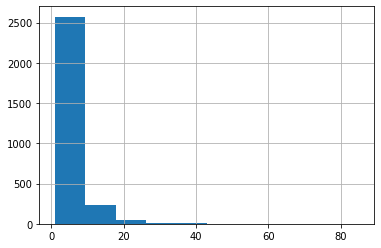

In [17]:
checkins_matrix.sum(1).hist()

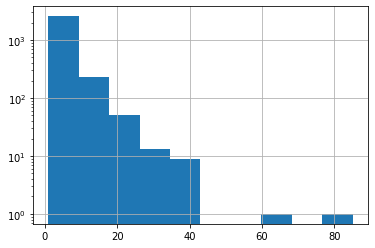

In [18]:
checkins_matrix.sum(1).hist(log=True)

# Computar similaridades

In [19]:
venue_1 = {1, 2, 4}

In [20]:
venue_2 = {3, 2, 4}

In [21]:
intersection = venue_1.intersection(venue_2)

In [22]:
len(intersection)

2

In [23]:
union = venue_1.union(venue_2)

In [24]:
len(union)

4

In [25]:
len(intersection) / len(union)

0.5

In [26]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index )
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    return intersection_length / union_length

In [27]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

In [28]:
checkins_matrix.head()

user_id,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue_id,,,,,,,,,,,,,,,,,,,,,
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
while True:
    try:
        query_venue_index = int( input('Please enter a query venue index: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass